<a href="https://colab.research.google.com/github/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/Proyecto_Peliculas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [282]:
import pandas as pd
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform
import statistics as stats
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Chapter 4&5
from sklearn.decomposition import PCA

# Chapter 6
from sklearn.decomposition import IncrementalPCA

# Chapter 7
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll

from mpl_toolkits.mplot3d import Axes3D
#from pydiffmap import diffusion_map as dm
#from pydiffmap.visualization import data_plot

# Chapter 8
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import plotly.express as px 
import pandas as pd
url="https://github.com/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/Peliculas.xlsx?raw=true"
datos=pd.read_excel(url)
datos1 = datos.drop(datos.columns[[8,9,10,11,12,13,14,15,16]], axis='columns')
datos1

,Pelicula,Titulo,Clasificacion 1,Clasificacion 2,year,rating,imdbId,tmdbId
0,1,Toy Story,Animation,Children,1995.0,4.0,114709,862.0
1,2,Jumanji,Children,Fantasy,1995.0,4.0,113497,8844.0
2,3,Grumpier Old Men,Romance,no-genres-listed,1995.0,4.5,113228,15602.0
3,4,Waiting to Exhale,Drama,Romance,1995.0,2.5,114885,31357.0
4,5,Father of the Bride Part II,no-genres-listed,no-genres-listed,1995.0,4.5,113041,11862.0
...,...,...,...,...,...,...,...,...
8776,128975,Hot Tub Time Machine 2,Sci-Fi,no-genres-listed,2015.0,4.0,2637294,243938.0
8777,128991,Johnny Express,Comedy,Sci-Fi,2014.0,4.5,3723996,269711.0
8778,129011,Eddie Izzard: Glorious,no-genres-listed,no-genres-listed,1997.0,4.5,195753,13590.0
8779,129229,Northmen - A Viking Saga,Adventure,no-genres-listed,2014.0,5.0,2290553,286873.0


In [283]:
datos1.isnull().sum()


Pelicula            0
Titulo              0
Clasificacion 1     0
Clasificacion 2     0
year               23
rating              0
imdbId              0
tmdbId              8
dtype: int64

In [284]:
datos1.dropna()
clean_datos=datos1.dropna()
clean_datos.isnull().sum()

Pelicula           0
Titulo             0
Clasificacion 1    0
Clasificacion 2    0
year               0
rating             0
imdbId             0
tmdbId             0
dtype: int64

In [285]:
correlation = clean_datos.corr()
correlation

,Pelicula,year,rating,imdbId,tmdbId
Pelicula,1.000000,0.484672,0.078132,0.827302,0.600559
year,0.484672,1.000000,0.018819,0.548368,0.259085
rating,0.078132,0.018819,1.000000,0.076515,0.047271
imdbId,0.827302,0.548368,0.076515,1.000000,0.718674
tmdbId,0.600559,0.259085,0.047271,0.718674,1.000000


In [289]:
#Entre las columnas tmdbld y imdbId existe una alta correlacion.Por lo tanto eliminaremos una de ellas
clean_datos=clean_datos.drop(['imdbId'], axis=1)

Si no sabemos el titilo de la pelicula de poco nos serviran el resto de datos,las peliculas sin años tambien pueden ser eliminadas.

In [291]:
text= {
    
  "Pelicula":{
    "0":129333,
    "1":129354,
    "2":129397,
    "3":129428,
    "4":129514,
    "5":129657
  },
  "Titulo":{
    "0":"Julia ",
    "1":"Focus ",
    "2":"Marvel One-Shot: Item 47 ",
    "3":"The Second Best Exotic Marigold Hotel ",
    "4":"George Carlin: It's Bad for Ya! ",
    "5":"Tracers "
  },
  "Clasificacion 1":{
    "0":"no-genres-listed",
    "1":"Thriller",
    "2":"Crime",
    "3":"Fantasy",
    "4":"Drama",
    "5":"no-genres-listed"
  },
  "Clasificacion 2":{
    "0":"no-genres-listed",
    "1":"no-genres-listed",
    "2":"Drama",
    "3":"Sci-Fi",
    "4":"no-genres-listed",
    "5":"no-genres-listed"
  },
  "year":{
    "0":2014,
    "1":2014,
    "2":2015,
    "3":2012,
    "4":2015,
    "5":2008
  },
  "rating":{
    "0":4.5,
    "1":5.0,
    "2":5.0,
    "3":4.5,
    "4":3.0,
    "5":4.5  
  },
 
  " tmdbId":{
    "0":179150,
    "1":278632,
    "2":256591,
    "3":119569,
    "4":268238,
    "5":13643	     
  }
}

text=pd.DataFrame(text)
text

,Pelicula,Titulo,Clasificacion 1,Clasificacion 2,year,rating,tmdbId
0,129333,Julia,no-genres-listed,no-genres-listed,2014,4.5,179150
1,129354,Focus,Thriller,no-genres-listed,2014,5.0,278632
2,129397,Marvel One-Shot: Item 47,Crime,Drama,2015,5.0,256591
3,129428,The Second Best Exotic Marigold Hotel,Fantasy,Sci-Fi,2012,4.5,119569
4,129514,George Carlin: It's Bad for Ya!,Drama,no-genres-listed,2015,3.0,268238
5,129657,Tracers,no-genres-listed,no-genres-listed,2008,4.5,13643


In [292]:
clean_datos.describe()

,Pelicula,year,rating,tmdbId
count,8750.000000,8750.000000,8750.000000,8750.000000
mean,29629.927543,1993.045257,3.548514,32511.311200
std,37530.128073,18.270663,1.036435,50119.955903
min,1.000000,1902.000000,0.500000,2.000000
25%,2909.000000,1987.000000,3.000000,9339.250000
50%,6416.000000,1998.000000,3.500000,14204.500000
75%,55111.500000,2006.000000,4.000000,34810.500000
max,129250.000000,2018.000000,5.000000,503475.000000


In [293]:
clean_datos.groupby("Clasificacion 1")['rating'].mean()

Clasificacion 1
Adventure           3.586837
Animation           3.541667
Children            3.714592
Comedy              3.492870
Crime               3.518640
Documentary         3.695652
Drama               3.598689
Fantasy             3.497890
Film-Noir           3.761905
Horror              3.492188
IMAX                3.900000
Musical             3.481013
Mystery             3.508889
Romance             3.536213
Sci-Fi              3.447552
Thriller            3.585288
War                 3.512987
Western             3.310000
no-genres-listed    3.539967
Name: rating, dtype: float64

In [294]:
clean_datos.groupby("Clasificacion 1")['Clasificacion 1'].count()

Clasificacion 1
Adventure            547
Animation            192
Children             233
Comedy               561
Crime                456
Documentary           46
Drama               1525
Fantasy              237
Film-Noir             42
Horror               320
IMAX                  10
Musical              158
Mystery              225
Romance              787
Sci-Fi               286
Thriller             469
War                  154
Western               50
no-genres-listed    2452
Name: Clasificacion 1, dtype: int64

In [295]:
#Agrupando la cantidad de peliculas por genero
h=["Adventure","Animation","Children","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","IMAX","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western","no-genres-listed"] 
J=[]
for e in range(19):   
 J.append(clean_datos.apply(lambda x: x['Clasificacion 1'] == h[e], axis=1).sum())
print(J)

[547, 192, 233, 561, 456, 46, 1525, 237, 42, 320, 10, 158, 225, 787, 286, 469, 154, 50, 2452]


Text(0, 0.5, 'Cantidad de filmes por genero')

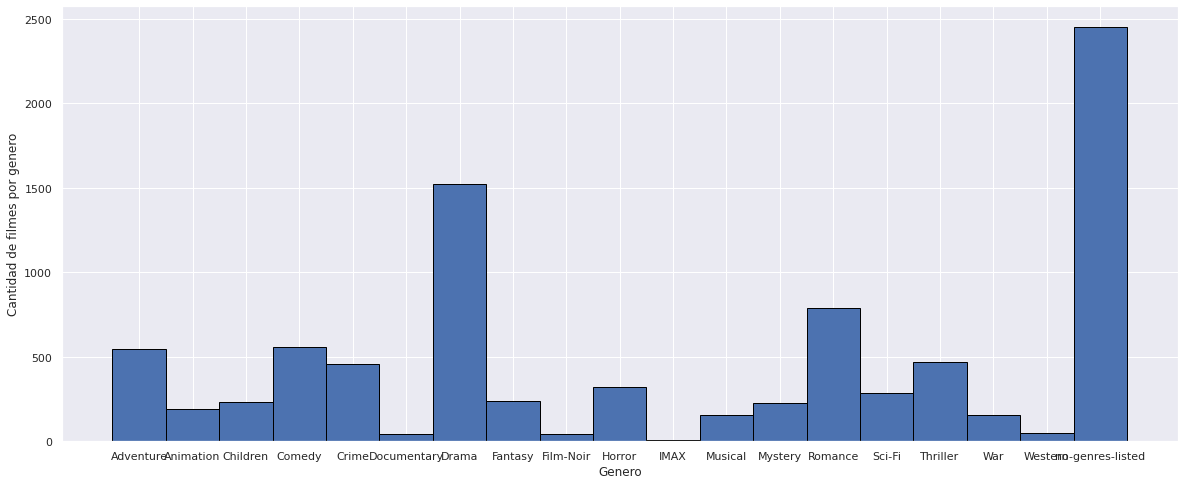

In [296]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plt.bar(x=h, height=J, width=1, edgecolor="black")
ax.set_xlabel('Genero')
ax.set_ylabel('Cantidad de filmes por genero')


In [297]:
#Codificando los generos cinematograficos para poderlos usar en la prediccion
GENERO_MAPEO = { "Adventure":1,"Animation":2,"Children":3,"Comedy":4,"Crime":5,"Documentary":6,"Drama":7,"Fantasy":8,"Film-Noir":9,"Horror":10,"IMAX":11,"Musical":12,"Mystery":13,"Romance":14,"Sci-Fi":15,"Thriller":16,"War":17,"Western":18,"no-genres-listed":0}
list_genero=clean_datos['Clasificacion 1']
list_genero= list_genero.map(GENERO_MAPEO).astype(int)
clean_datos['Clasificacion 1']=list_genero
list_genero2=clean_datos['Clasificacion 2']
list_genero2= list_genero2.map(GENERO_MAPEO).astype(int)
clean_datos['Clasificacion 2']=list_genero2
clean_datos

,Pelicula,Titulo,Clasificacion 1,Clasificacion 2,year,rating,tmdbId
0,1,Toy Story,2,3,1995.0,4.0,862.0
1,2,Jumanji,3,8,1995.0,4.0,8844.0
2,3,Grumpier Old Men,14,0,1995.0,4.5,15602.0
3,4,Waiting to Exhale,7,14,1995.0,2.5,31357.0
4,5,Father of the Bride Part II,0,0,1995.0,4.5,11862.0
...,...,...,...,...,...,...,...
8776,128975,Hot Tub Time Machine 2,15,0,2015.0,4.0,243938.0
8777,128991,Johnny Express,4,15,2014.0,4.5,269711.0
8778,129011,Eddie Izzard: Glorious,0,0,1997.0,4.5,13590.0
8779,129229,Northmen - A Viking Saga,1,0,2014.0,5.0,286873.0


In [299]:
train_x=clean_datos.drop(['Titulo'], axis=1)
train_y=clean_datos['rating']
train_x,train_y

(      Pelicula  Clasificacion 1  Clasificacion 2    year  rating    tmdbId
 0            1                2                3  1995.0     4.0     862.0
 1            2                3                8  1995.0     4.0    8844.0
 2            3               14                0  1995.0     4.5   15602.0
 3            4                7               14  1995.0     2.5   31357.0
 4            5                0                0  1995.0     4.5   11862.0
 ...        ...              ...              ...     ...     ...       ...
 8776    128975               15                0  2015.0     4.0  243938.0
 8777    128991                4               15  2014.0     4.5  269711.0
 8778    129011                0                0  1997.0     4.5   13590.0
 8779    129229                1                0  2014.0     5.0  286873.0
 8780    129250                0                0  2015.0     5.0  325358.0
 
 [8750 rows x 6 columns], 0       4.0
 1       4.0
 2       4.5
 3       2.5
 4       

In [300]:
train_x.dtypes

Pelicula             int64
Clasificacion 1      int64
Clasificacion 2      int64
year               float64
rating             float64
tmdbId             float64
dtype: object

In [301]:
train_x['Pelicula'] = clean_datos['Pelicula'].astype('float64')
train_x['year'] = clean_datos['year'].astype('float64')

In [302]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(train_x)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc = StandardScaler()
#X = X.values
X_std =  sc.fit_transform(train_x)  
cov_matrix = np.cov(X_std.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(X_std)

[[-0.78951558 -0.73311559 -0.22025252  0.10699418  0.43563897 -0.63150734]
 [-0.78948893 -0.55659491  0.57651016  0.10699418  0.43563897 -0.47224031]
 [-0.78946228  1.38513254 -0.69831013  0.10699418  0.91808942 -0.3373961 ]
 ...
 [ 2.64818579 -1.08615695 -0.69831013  0.21646553  0.91808942 -0.37754208]
 [ 2.65399479 -0.90963627 -0.69831013  1.14697207  1.40053986  5.07534814]
 [ 2.65455437 -1.08615695 -0.69831013  1.20170775  1.40053986  5.84324984]]


In [303]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
cum_var_exp = np.cumsum(var_explained)

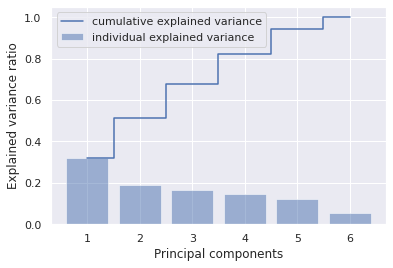

In [304]:
plt.bar(range(1,len(var_explained)+1), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,len(var_explained)+1),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [309]:
pca = PCA(n_components = 5)
pca.fit(X_std)
x_pca = pca.transform(X_std)
pca.explained_variance_ratio_

array([0.32106146, 0.19010731, 0.16575375, 0.14431143, 0.12320668])

In [310]:
pca.explained_variance_ratio_.sum()

0.9444406278492409

In [312]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5).fit(X)
principal_comps = pca.transform(X)
pca_db = pd.DataFrame(data = principal_comps, columns=['pca1', 'pca2','pca3','pca4','pca5',])
pca_db

,pca1,pca2,pca3,pca4,pca5
0,-0.195509,-0.035795,-0.251548,-0.123810,-0.088301
1,0.077122,-0.022223,-0.325568,-0.125648,-0.088209
2,-0.065008,-0.446768,0.284094,-0.231838,-0.096302
3,0.466327,-0.127027,-0.330941,0.203442,-0.077632
4,-0.390383,0.018336,-0.247454,-0.232160,-0.086060
...,...,...,...,...,...
8745,0.100743,0.343937,0.960393,0.006820,0.085295
8746,0.594127,0.860122,0.215426,-0.109501,0.102434
8747,-0.254039,0.743986,0.314523,-0.124702,0.179761
8748,-0.221994,0.844360,0.457757,-0.211996,0.110648


In [313]:
pca_db.var()

pca1    0.129682
pca2    0.100768
pca3    0.086281
pca4    0.052418
pca5    0.017626
dtype: float64

In [314]:
pca.components_

array([[ 1.36056990e-01,  4.18288305e-01,  8.97485219e-01,
         3.03554709e-02,  9.49384242e-03,  5.66419398e-03],
       [ 7.22274066e-01, -5.99492699e-01,  1.59675108e-01,
         2.42969940e-01,  9.57662378e-02,  1.58830012e-01],
       [ 5.59582794e-01,  6.82193990e-01, -4.10309701e-01,
         1.74101649e-01,  7.79845194e-02,  1.29350055e-01],
       [ 1.06468122e-01,  1.81935066e-04, -8.05742303e-03,
         6.41578578e-02, -9.91907578e-01,  2.45501566e-02],
       [ 2.82253537e-01, -1.44550100e-02, -4.50656597e-03,
        -9.49234581e-01, -2.77204142e-02,  1.35236733e-01]])

In [315]:
print(pca.explained_variance_ratio_)

[0.33023109 0.25660158 0.2197122  0.13347917 0.04488324]


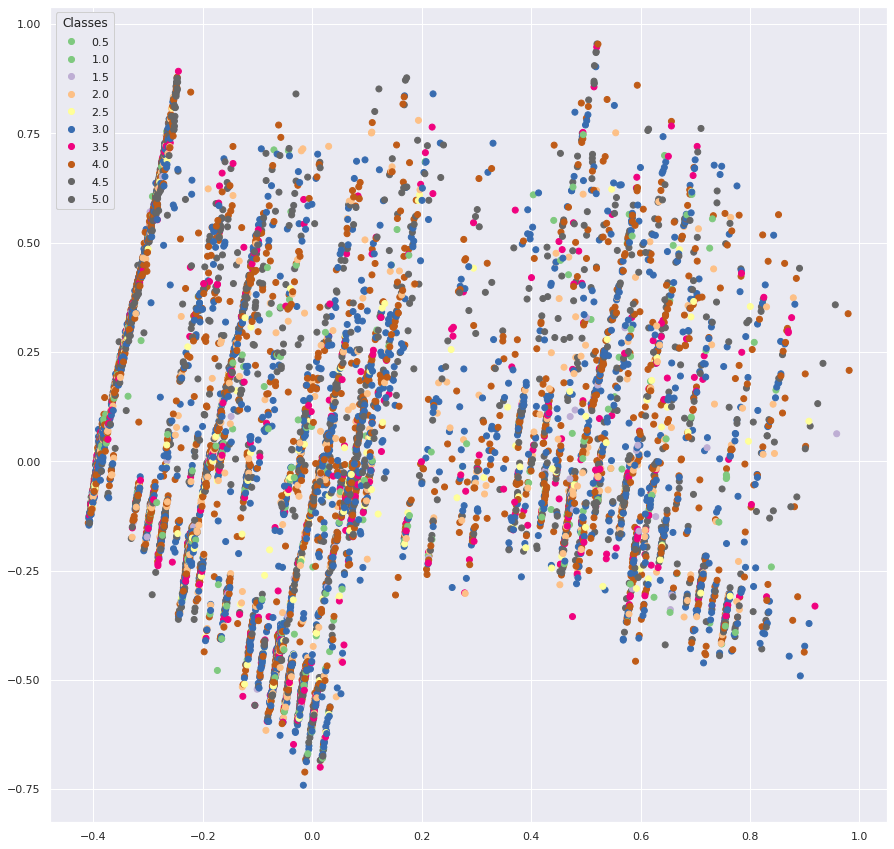

In [316]:
# y visualicemos el resultado
fig, ax = plt.subplots(figsize=(15, 15))
Y=datos1['rating']
grafico=pca_db
grafico['class']=Y
scatter = ax.scatter(grafico['pca1'],grafico['pca2'],c=grafico['class'], cmap="Accent")
legend1 = ax.legend(*scatter.legend_elements(),loc="upper left", title="Classes")
ax.add_artist(legend1)
ax.grid(True)
plt.show()

In [317]:
# Entrenemos el modelo

from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=1000, tol=1e-3)
train_y = train_y.astype('int')
model.fit(train_x,train_y)

SGDClassifier()

In [318]:
from sklearn import metrics

predicted_train = model.predict(train_x)
metrics.accuracy_score(train_y, predicted_train)

0.2662857142857143

In [319]:
#Llevando los componentes de pruba al mismo redimensionamiento que los de entrenamiento
x_reduced=pca_db
x_train, x_test, y_train, y_test = train_test_split(x_reduced,train_y, test_size = 0.2, random_state = 1) 

In [320]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), PCA(n_components=2), SGDClassifier(max_iter=10000, tol=1e-3))    

pipe.fit(x_train, y_train)
pipe_test = pipe.predict(x_test)
metrics.accuracy_score(y_test, pipe_test)

0.36

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



regressor = LinearRegression()
regressor.fit(x_train, y_train) #Creates model



LinearRegression()

In [322]:
x_train

,pca1,pca2,pca3,pca4,pca5,class
3807,-0.390909,-0.008322,-0.269521,0.321872,-0.021917,5.0
3901,0.477181,-0.047358,-0.268711,-0.118428,-0.130093,4.0
2852,-0.385055,0.050211,-0.223365,-0.226239,-0.118576,3.5
3455,-0.387119,0.022450,-0.246374,0.105233,-0.118068,3.0
4285,-0.013261,-0.495374,0.371736,0.107890,-0.132049,3.0
...,...,...,...,...,...,...
2895,-0.018465,-0.535775,0.339774,0.324996,-0.116088,4.0
7813,0.083563,0.047097,0.792350,-0.033402,-0.008711,4.0
905,0.515041,-0.128980,-0.357902,-0.251658,0.100443,4.0
5192,-0.072218,-0.534335,0.220336,0.191166,0.314388,4.5


In [323]:
x_train["ranting"]=y_train

In [324]:
y_train = scaler.fit_transform(pd.DataFrame(y_train))

In [325]:
y_train


array([[0.4],
       [0.8],
       [0.8],
       ...,
       [0.8],
       [0.4],
       [0.8]])

In [333]:
x_train.replace([np.inf, -np.inf], np.nan, inplace=True)# Limpiando pq me parece que seque aLGUN NUMERO INFINITO O nan POR AHI
regressor = LinearRegression()
regressor.fit(x_train,x_train["ranting"]) #Creates model

LinearRegression()

<ipython-input-334-a5be07c82020>:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


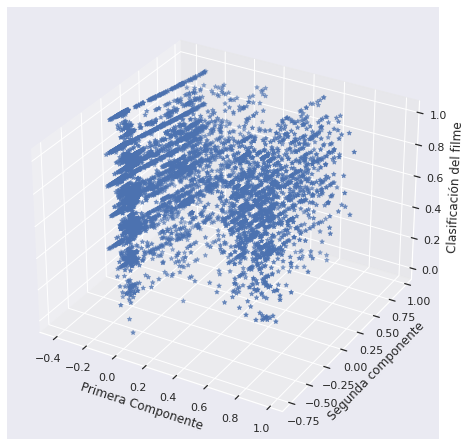

In [334]:
from matplotlib import pyplot             # Permite la generación de gráficos
from mpl_toolkits.mplot3d import Axes3D   # Permite agregar eje tridimensionales
import random                             # Permiten obtener de distintos modos números aleatorios
import pandas as pd                    ## Este proporciona una estructura similiar a los data.frame
import statsmodels.api as sm           ## Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf  ## Permite ajustar modelos estadísticos utilizando fórmulas de estilo R
fig = pyplot.figure(figsize=(8, 6))       # Ajustes del gráfico
ax = Axes3D(fig)

x1 =x_train["pca1"]                             # Datos eje X
x2 = x_train["pca2"]                             # Datos eje Y
y = y_train                             # Datos eje Z (Var. Respuesta)

ax.scatter(x1, x2, y, marker='*', c='b')
ax.set_xlabel('Primera Componente')        # Etiqueta del eje X
ax.set_ylabel('Segunda componente')       # Etiqueta del eje Y
ax.set_zlabel('Clasificación del filme');        # Etiqueta del eje Z (Var. Respuesta)

In [335]:
mod = smf.ols('ranting~pca1 + pca2',data=x_train).fit() 
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                ranting   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     67.52
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           9.01e-30
Time:                        00:24:25   Log-Likelihood:                 1012.8
No. Observations:                7000   AIC:                            -2020.
Df Residuals:                    6997   BIC:                            -1999.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6931      0.003    276.896      0.0

In [355]:
mod.params

Intercept    0.693144
pca1         0.013575
pca2         0.090343
dtype: float64

In [356]:
mod.mse_resid

0.04385710815056963

In [357]:
data0=x_train
data0["ranting"]=y_train

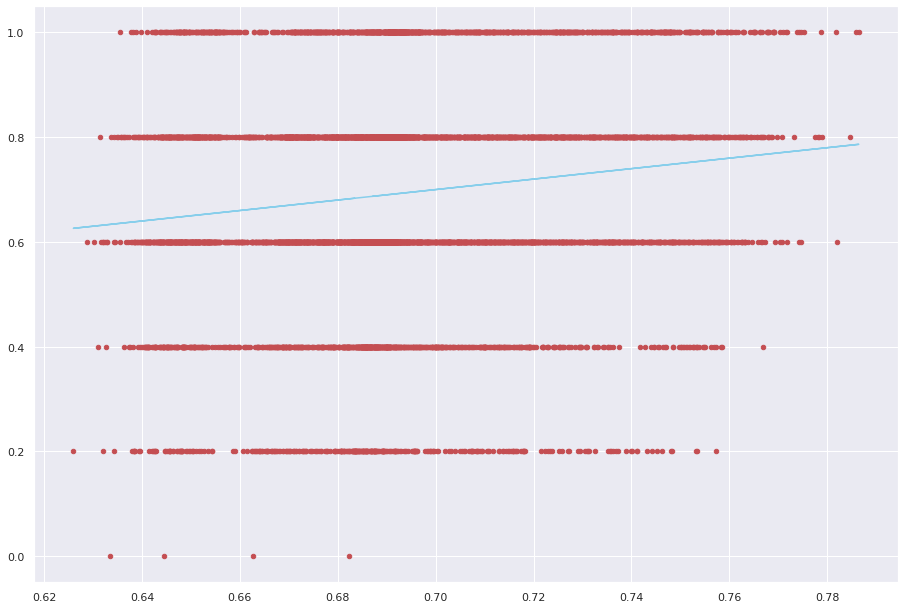

In [364]:
NOX_predict = mod.predict(x_train[["pca1", "pca2"]])
x_train["NOX_predict"] = NOX_predict


x =x_train["NOX_predict"] #todos los valores de la variable NOx
y = x_train["ranting"] #todos los valores de la variable Nox estimada con MLRM
a, b = np.polyfit(x, y, 1) # 1 es el grado del polinomio

r = np.corrcoef(x, y) # r = coeficiente de correlación
plt.plot(x, a * x + b, color="skyblue")
plt.subplot(111)
plt.scatter(x,y, color="r", s=20)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2, wspace=0.2, hspace=0.2)
plt.show()